#LOAD DATASET

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jakewright/house-price-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jakewright/house-price-data/versions/4


In [15]:
import pandas as pd

# Ganti 'path/to/your/dataset.csv' dengan path ke file dataset kamu
df = pd.read_csv('/root/.cache/kagglehub/datasets/jakewright/house-price-data/versions/4/kaggle_london_house_price_data.csv')

In [16]:
num_rows = len(df)
print(f"Jumlah baris dataset: {num_rows}")

Jumlah baris dataset: 282872


In [17]:
df.isnull().sum()

,0
fullAddress,0
postcode,0
country,0
outcode,0
latitude,0
longitude,0
bathrooms,51103
bedrooms,26218
floorAreaSqM,15812
livingRooms,39135


tampilkan data per

#CLEANING & PREPARING DATASET

In [ ]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Tambahkan target numerik sementara
numeric_df['saleEstimate_confidenceLevel'] = df['saleEstimate_confidenceLevel'].map({'LOW': 0, 'MEDIUM': 1, 'HIGH': 2})

# Hitung korelasi
correlation = numeric_df.corr()['saleEstimate_confidenceLevel'].sort_values(ascending=False)
print(correlation)

saleEstimate_confidenceLevel                 1.000000
bedrooms                                     0.123993
longitude                                    0.123765
livingRooms                                  0.077666
saleEstimate_valueChange.numericChange       0.076538
bathrooms                                    0.003392
floorAreaSqM                                -0.019193
latitude                                    -0.037376
history_percentageChange                    -0.038032
saleEstimate_valueChange.percentageChange   -0.078411
history_numericChange                       -0.092844
saleEstimate_lowerPrice                     -0.129494
history_price                               -0.173502
saleEstimate_currentPrice                   -0.182567
rentEstimate_lowerPrice                     -0.183515
rentEstimate_currentPrice                   -0.183745
rentEstimate_upperPrice                     -0.183878
saleEstimate_upperPrice                     -0.223079
Name: saleEstimate_confidenc

In [18]:
df = pd.DataFrame(df)

In [19]:
df['bedrooms'].fillna(df['bedrooms'].mode().iloc[0], inplace=True)
df['saleEstimate_upperPrice'].fillna(df['saleEstimate_upperPrice'].mean(), inplace=True)
df['history_price'].fillna(df['history_price'].mean(), inplace=True)
df['history_price'].fillna(df['history_price'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mode().iloc[0], inplace=True)
df_cleaned = df.dropna()

# Save the cleaned dataframe to a CSV file
output_file_path = '/content/sample_data/cleaned_data.csv'
df_cleaned.to_csv(output_file_path, index=False)

print(f"Data cleaned successfully saved to '{output_file_path}'!")


<ipython-input-19-c371e0308b0a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].mode().iloc[0], inplace=True)
<ipython-input-19-c371e0308b0a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Data cleaned successfully saved to '/content/sample_data/cleaned_data.csv'!


In [ ]:
df_cleaned = pd.read_csv('/content/sample_data/cleaned_data.csv')

num_rows = len(df_cleaned)
print(f"Jumlah baris dataset setelah penghapusan baris dengan nilai null: {num_rows}")

Jumlah baris dataset setelah penghapusan baris dengan nilai null: 124083


In [ ]:
df_cleaned.isnull().sum()

,0
fullAddress,0
postcode,0
country,0
outcode,0
latitude,0
longitude,0
bathrooms,0
bedrooms,0
floorAreaSqM,0
livingRooms,0


#Visualization

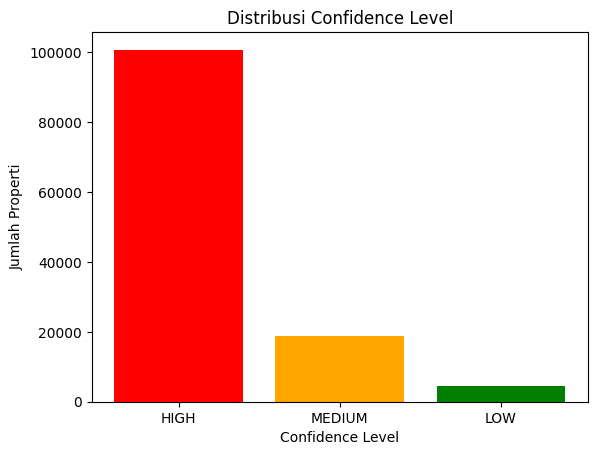

In [ ]:
import matplotlib.pyplot as plt


confidence_counts = df_cleaned['saleEstimate_confidenceLevel'].value_counts()

plt.bar(confidence_counts.index, confidence_counts.values, color=['red', 'orange', 'green'])
plt.title("Distribusi Confidence Level")
plt.xlabel("Confidence Level")
plt.ylabel("Jumlah Properti")
plt.show()

#MACHINE LEARNING KLASIFIKASI

Dengan Oversampling

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from imblearn.over_sampling import SMOTE

# Step 1: Define Features and Target
features = ['saleEstimate_upperPrice', 'history_price', 'bedrooms', 'longitude']
target = 'saleEstimate_confidenceLevel'

# Encode target (LOW=0, MEDIUM=1, HIGH=2)
df_cleaned['saleEstimate_confidenceLevel'] = df_cleaned['saleEstimate_confidenceLevel'].map({'LOW': 0, 'MEDIUM': 1, 'HIGH': 2})

X = df_cleaned[features]
y = df_cleaned[target]

# Step 2: Apply SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
from collections import Counter
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))

# Step 3: Split Resampled Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Define Reduced Hyperparameter Space
param_dist = {
    'n_estimators': [100, 150, 200],       # More values for number of estimators
    'max_depth': [None, 10, 20],          # Testing deeper trees
    'min_samples_split': [2, 5, 10],      # Adjust splitting thresholds
    'min_samples_leaf': [1, 2, 5],        # Adjust minimum leaf size
    'max_features': ['sqrt', 'log2']      # Multiple feature selection strategies
}

# Hyperparameter Tuning dengan RandomizedSearchCV
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)

# Display Best Parameters and Accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy (3-Fold):", random_search.best_score_)

# Step 6: Evaluate Model on Test Set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification Report and Accuracy
print("\n--- Evaluation Metrics ---")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['LOW', 'MEDIUM', 'HIGH']))
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


print(f"\nBest Cross-Validation Accuracy (3-Fold): {random_search.best_score_:.4f}")



Original class distribution: Counter({2: 100765, 1: 18702, 0: 4616})
Resampled class distribution: Counter({2: 100765, 1: 100765, 0: 100765})
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Cross-Validation Accuracy (3-Fold): 0.8382912386906828

--- Evaluation Metrics ---
Classification Report:
              precision    recall  f1-score   support

         LOW       0.90      0.92      0.91     20197
      MEDIUM       0.85      0.79      0.82     19990
        HIGH       0.85      0.89      0.87     20272

    accuracy                           0.87     60459
   macro avg       0.87      0.87      0.87     60459
weighted avg       0.87      0.87      0.87     60459

Test Set Accuracy: 0.8678

Confusion Matrix:
[[18648  1053   496]
 [ 1446 15857  2687]
 [  553  1759 17960]]

Best Cross-Validation Accuracy (3-Fold): 0.8383


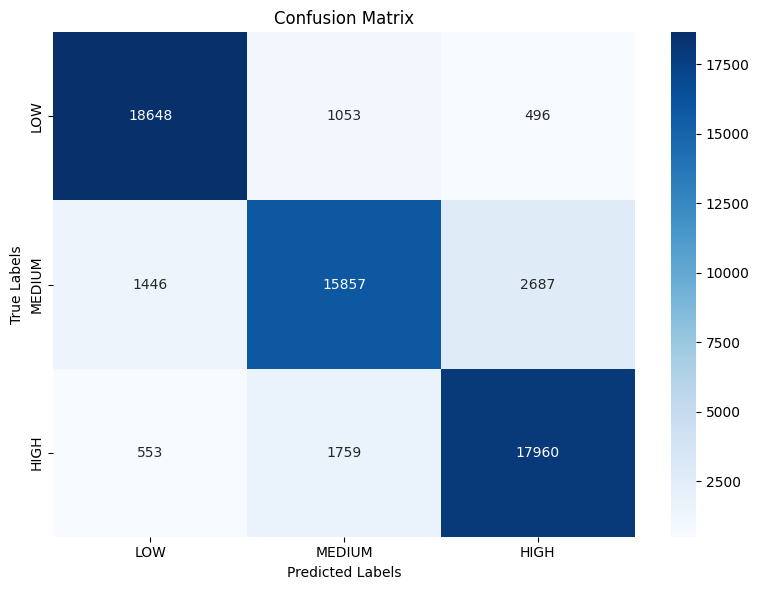

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
labels = ['LOW', 'MEDIUM', 'HIGH']  # Class labels

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.tight_layout()
plt.show()


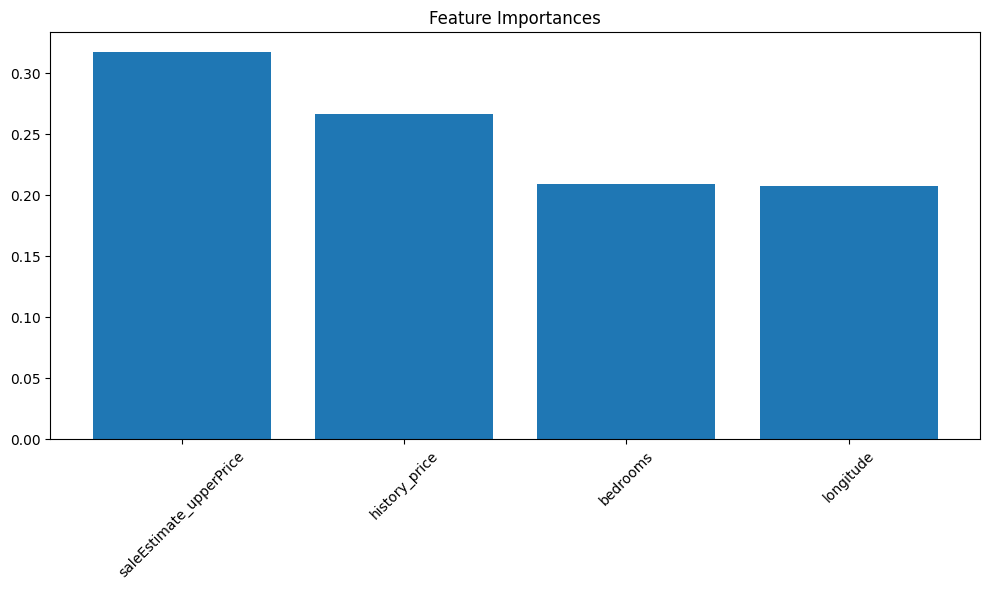

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil feature importance dari model terbaik
feature_importances = best_model.feature_importances_

# Urutkan berdasarkan kepentingan
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), sorted_features, rotation=45)
plt.tight_layout()
plt.show()
